In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("User+App+Behaviour.csv")
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
missing_perc=(data.isnull().sum()/len(data.index))*100

In [5]:
missing_perc

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

# Imputing Missing Values

missing value percentage is less we can impute missing value with mean

In [6]:
missing=['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']

In [7]:
for value in missing:
    data[value]=data[value].fillna(data[value].mean())

In [8]:
missing_perc=(data.isnull().sum()/len(data.index))*100
missing_perc

CustomerID                     0.0
Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

# EDA

<AxesSubplot:xlabel='Churn', ylabel='count'>

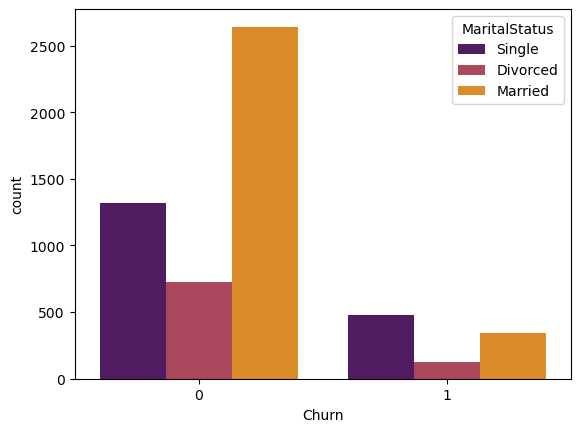

In [9]:
sns.countplot(data.Churn,hue=data.MaritalStatus,palette='inferno')

Single People is having More Churn as Compared to divorced and Married People

<AxesSubplot:xlabel='Churn', ylabel='count'>

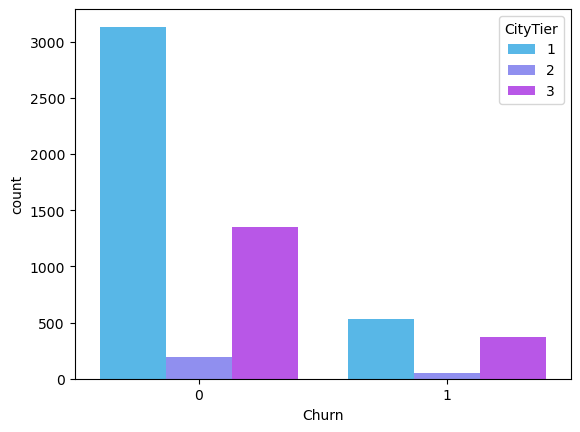

In [10]:
sns.countplot(data.Churn,hue=data.CityTier,palette='cool')

Tier 1 population is having more churn as compared to Tier 2 and 3

<AxesSubplot:xlabel='Churn', ylabel='count'>

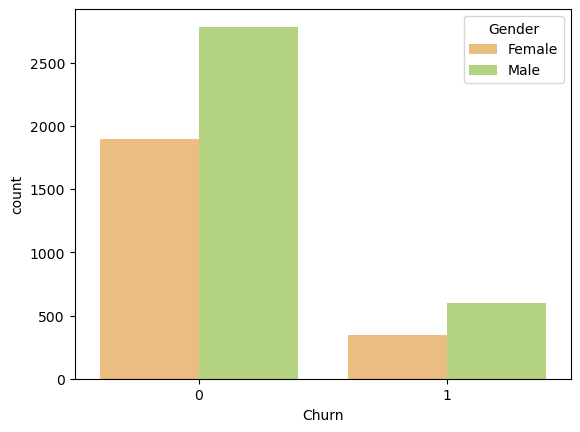

In [11]:
sns.countplot(data.Churn,hue=data.Gender,palette='RdYlGn')

Male Customers are having More Churn as Compared to Female

<AxesSubplot:xlabel='Churn', ylabel='count'>

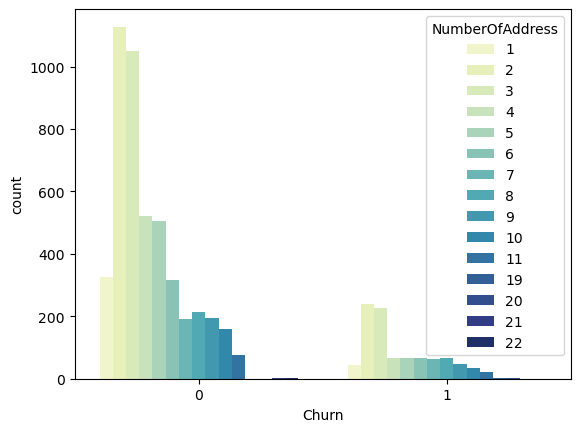

In [12]:
sns.countplot(data.Churn,hue=data.NumberOfAddress,palette='YlGnBu')

People With Less Number of Address are having More Churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

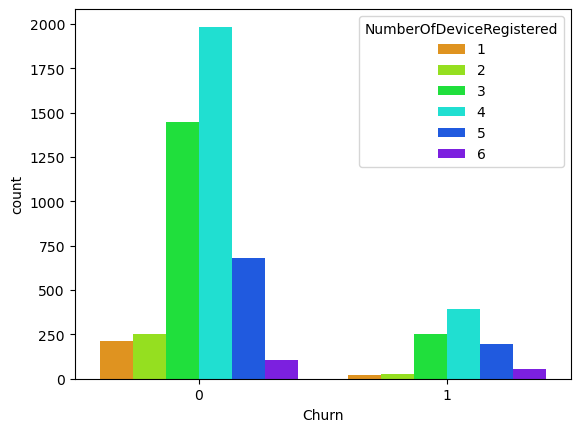

In [13]:
sns.countplot(data.Churn,hue=data.NumberOfDeviceRegistered,palette='gist_rainbow')

People with 3,4,5 Registered Devices are having more Churn

<AxesSubplot:xlabel='WarehouseToHome', ylabel='Churn'>

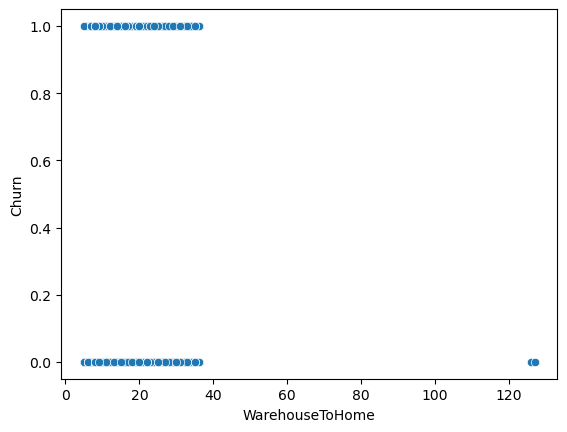

In [14]:
sns.scatterplot(y=data.Churn,x=data.WarehouseToHome)

<AxesSubplot:xlabel='Churn', ylabel='count'>

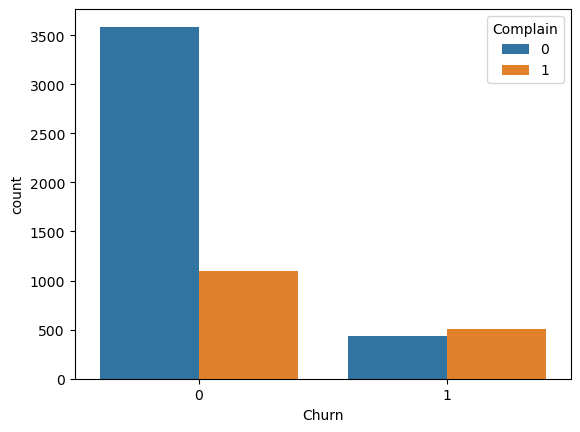

In [15]:
sns.countplot(data.Churn,hue=data.Complain)

People with Complain are having more churn 

<AxesSubplot:xlabel='Churn', ylabel='count'>

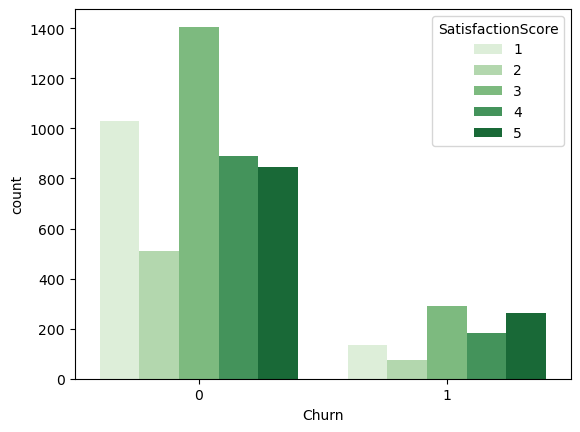

In [16]:
sns.countplot(data.Churn,hue=data.SatisfactionScore,palette='Greens')

People with Satisfaction score of 4 and 5,3 are having more churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

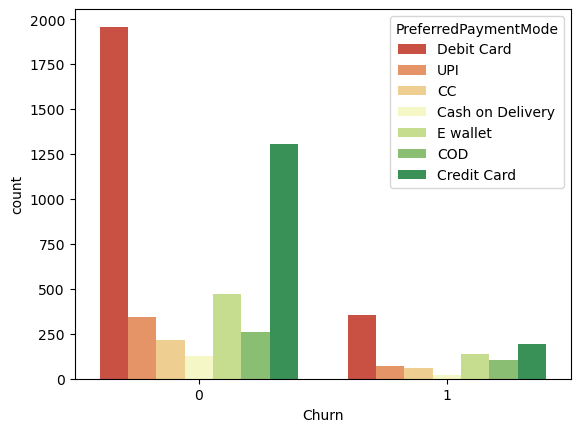

In [17]:

sns.countplot(data.Churn,hue=data.PreferredPaymentMode,palette='RdYlGn')

People paying with Debit Card is having more Churn followed by Credit Card,COD,E Wallet

<AxesSubplot:xlabel='Churn', ylabel='count'>

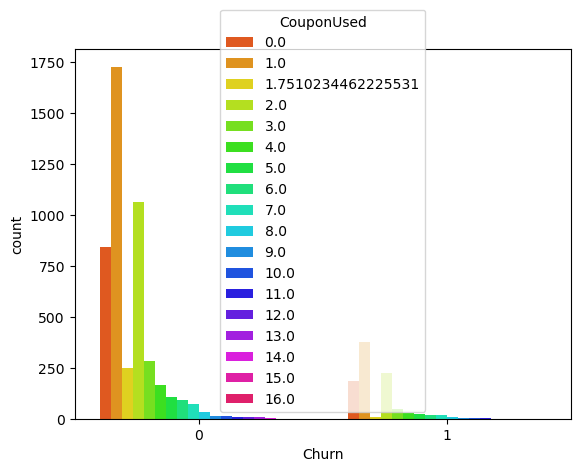

In [18]:


sns.countplot(data.Churn,hue=data.CouponUsed,palette='hsv')

In [19]:
data.CouponUsed.value_counts()

1.000000     2105
2.000000     1283
0.000000     1030
3.000000      327
1.751023      256
4.000000      197
5.000000      129
6.000000      108
7.000000       89
8.000000       42
10.000000      14
9.000000       13
11.000000      12
12.000000       9
13.000000       8
14.000000       5
16.000000       2
15.000000       1
Name: CouponUsed, dtype: int64

In [20]:
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.000000,160
1,50002,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.000000,121
2,50003,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.000000,120
3,50004,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.000000,134
4,50005,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.000000,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.000000,Computer,1,30.0,Credit Card,Male,3.000000,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.000000,151
5626,55627,0,13.000000,Mobile Phone,1,13.0,Credit Card,Male,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,4.543491,225
5627,55628,0,1.000000,Mobile Phone,1,11.0,Debit Card,Male,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.000000,186
5628,55629,0,23.000000,Computer,3,9.0,Credit Card,Male,4.000000,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.000000,179


For Categorical Variables We will create Dummy Variables

In [21]:
dummy=pd.get_dummies(data[['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']],drop_first=True)

In [22]:
data=pd.concat([data,dummy],axis=1)

In [23]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,...,0,1,1,0,0,1,0,0,0,1
2,50003,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,...,0,0,1,0,0,1,0,0,0,1
3,50004,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,...,0,0,1,0,1,0,0,0,0,1
4,50005,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,...,0,0,1,0,0,1,0,0,0,1


Dropping the Repeated Variable

In [24]:
data=data.drop(['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'],axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             5630 non-null   int64  
 1   Churn                                  5630 non-null   int64  
 2   Tenure                                 5630 non-null   float64
 3   CityTier                               5630 non-null   int64  
 4   WarehouseToHome                        5630 non-null   float64
 5   HourSpendOnApp                         5630 non-null   float64
 6   NumberOfDeviceRegistered               5630 non-null   int64  
 7   SatisfactionScore                      5630 non-null   int64  
 8   NumberOfAddress                        5630 non-null   int64  
 9   Complain                               5630 non-null   int64  
 10  OrderAmountHikeFromlastYear            5630 non-null   float64
 11  Coup

Checking For Outliers

In [26]:
num_data=data[['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear','OrderCount','DaySinceLastOrder','CashbackAmount']]

In [27]:
num_data.describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,10.189899,15.639896,2.931535,3.688988,4.214032,15.707922,3.008004,4.543491,177.221492
std,8.354164,8.339095,0.705384,1.023999,2.583586,3.587926,2.871521,3.553382,49.193869
min,0.000000,5.000000,0.000000,1.000000,1.000000,11.000000,1.000000,0.000000,0.000000
25%,3.000000,9.000000,2.000000,3.000000,2.000000,13.000000,1.000000,2.000000,146.000000
50%,9.000000,14.000000,3.000000,4.000000,3.000000,15.000000,2.000000,4.000000,163.000000
75%,15.000000,20.000000,3.000000,4.000000,6.000000,18.000000,3.008004,7.000000,196.000000
max,61.000000,127.000000,5.000000,6.000000,22.000000,26.000000,16.000000,46.000000,325.000000


# Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=data.drop(['CustomerID','Churn'],axis=1)
X.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.000000,3,6.0,3.000000,3,2,9,1,11.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,10.189899,1,8.0,3.000000,4,3,7,1,15.0,0.0,...,0,1,1,0,0,1,0,0,0,1
2,10.189899,1,30.0,2.000000,4,3,6,1,14.0,0.0,...,0,0,1,0,0,1,0,0,0,1
3,0.000000,3,15.0,2.000000,4,5,8,0,23.0,0.0,...,0,0,1,0,1,0,0,0,0,1
4,0.000000,1,12.0,2.931535,3,5,3,0,11.0,1.0,...,0,0,1,0,0,1,0,0,0,1


In [30]:
y=data['Churn']

In [31]:
# Splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

# Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()
X_train[['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']]=scaler.fit_transform(X_train[['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']])
X_train.head()


,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
4478,-1.094501,-0.719,-0.437250,0.093316,0.303601,0.680172,-0.465169,1.575872,-0.760361,-0.415849,...,0,0,0,0,0,0,1,0,0,1
3685,0.808280,-0.719,-0.318576,1.512740,1.281026,-0.044744,-0.465169,1.575872,-0.204314,0.125248,...,0,0,0,0,1,0,0,0,0,1
731,-1.213424,-0.719,-0.793270,-0.003865,0.303601,-0.044744,-0.853874,-0.634569,-1.038384,-0.956946,...,0,0,1,0,0,1,0,0,0,1
291,-0.001603,-0.719,-0.911943,-1.326107,-0.673824,-0.769660,-0.853874,1.575872,2.019871,-0.415849,...,0,0,1,0,0,0,1,0,0,0
184,-0.737729,-0.719,-0.555923,-1.326107,-0.673824,-0.769660,-1.242579,1.575872,-1.038384,-0.956946,...,0,0,1,0,0,0,1,0,0,0


In [34]:
churn=(data['Churn'].sum()/len(data.Churn.index))
churn

0.16838365896980462

We have Almost 16% Churn Rate

# Looking at Correlations

<AxesSubplot:>

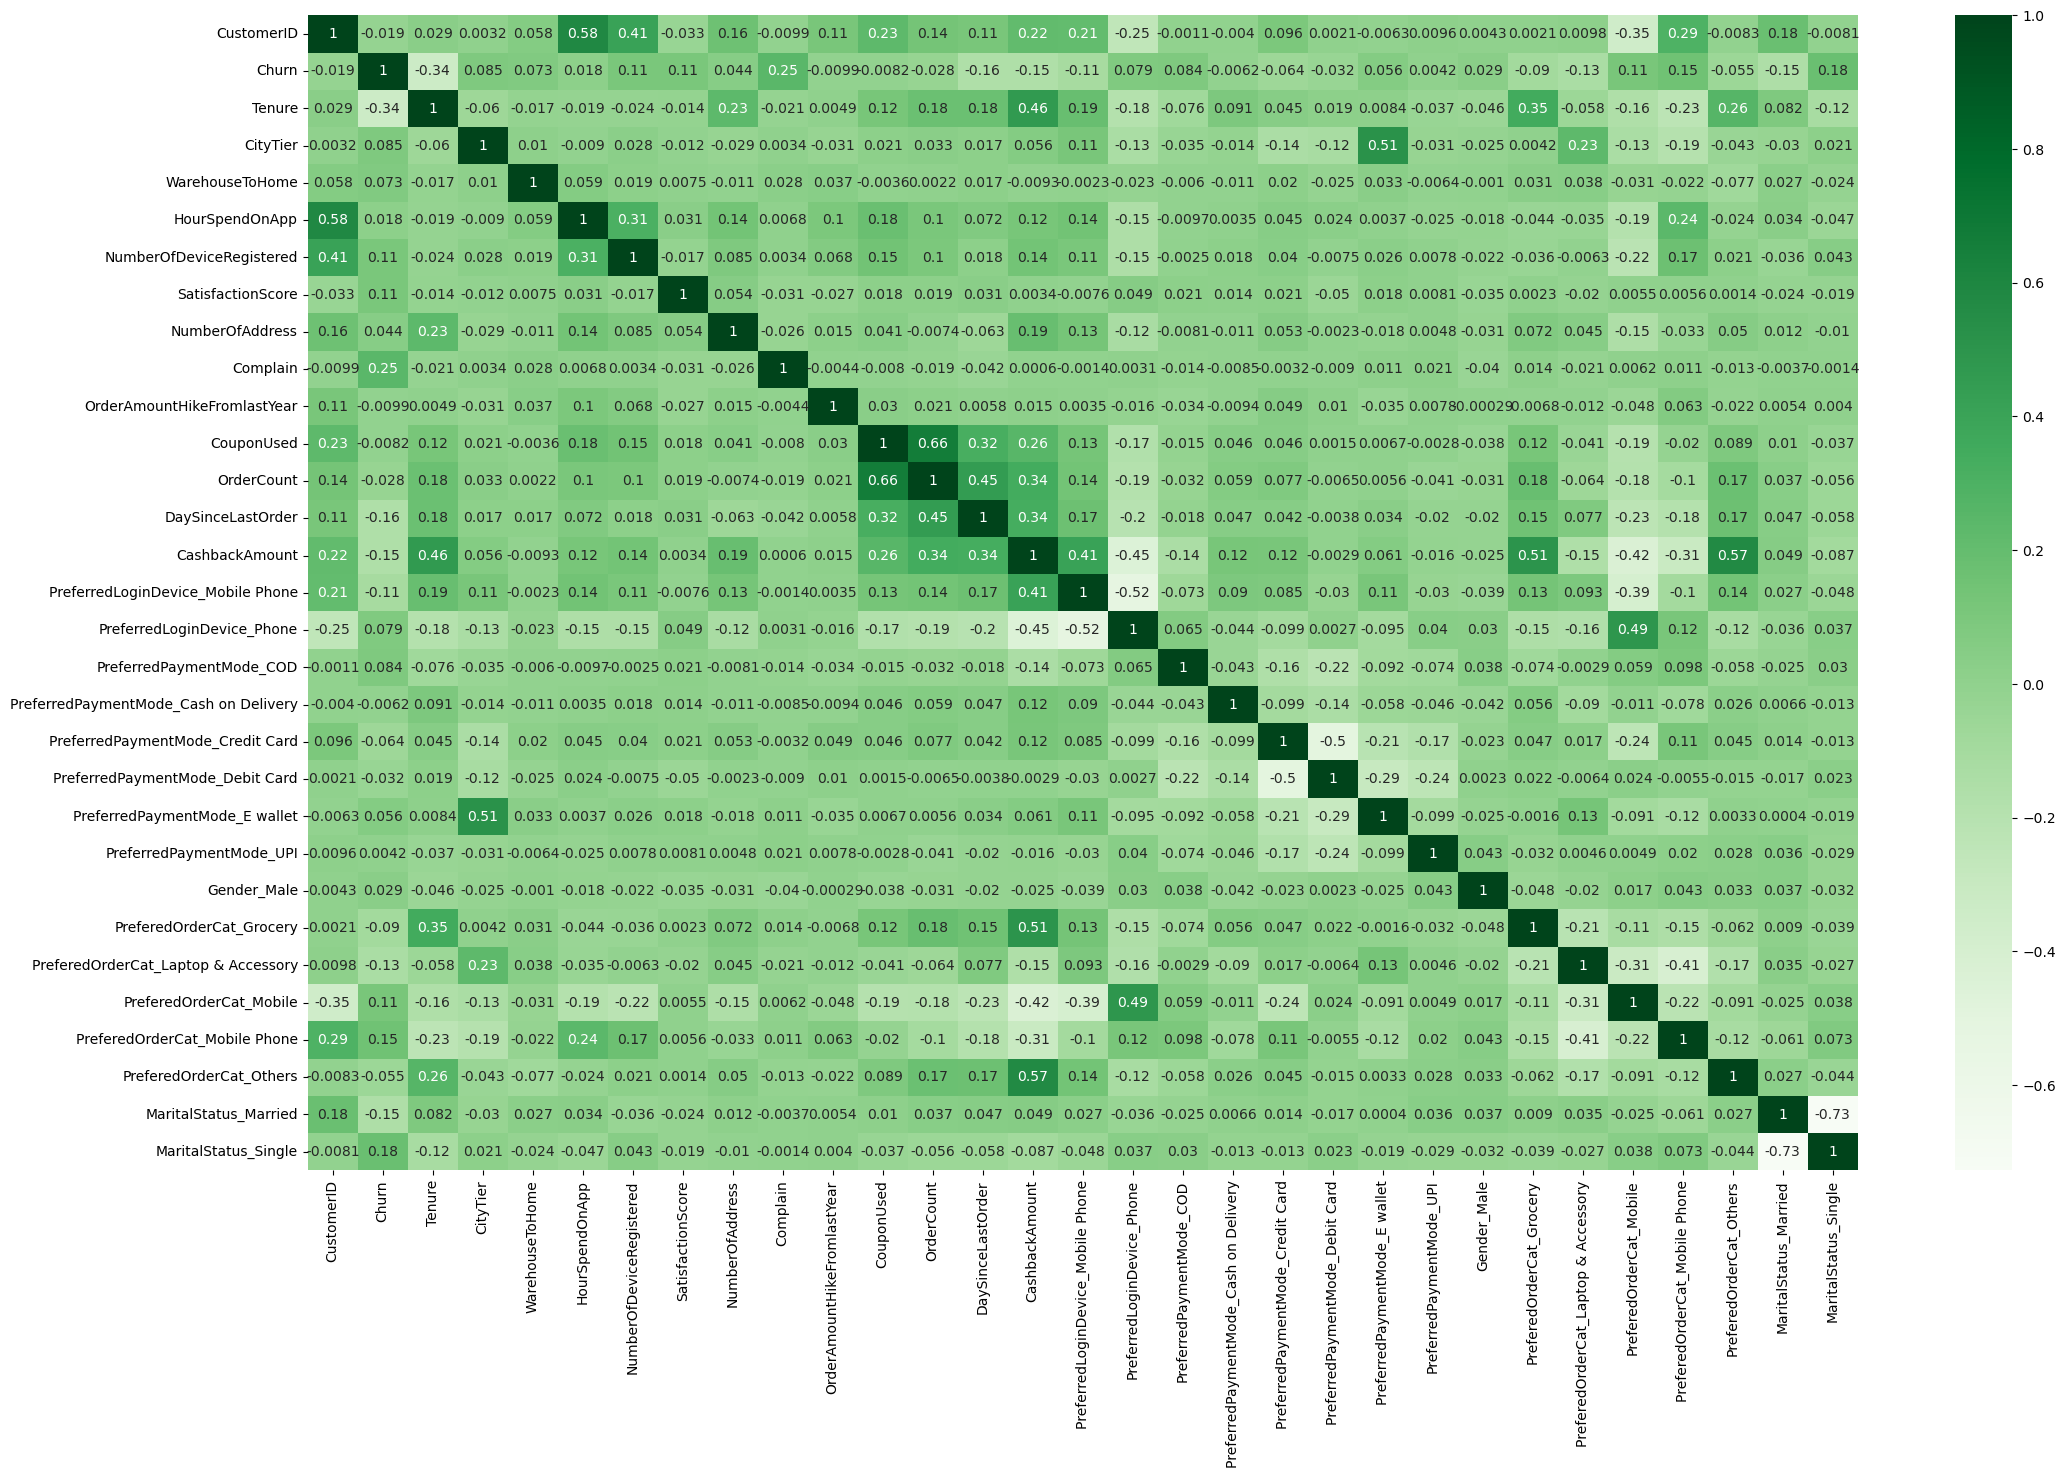

In [35]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True,cmap='Greens')

# Model Buiding

In [36]:
import statsmodels.api as sm

In [37]:
logm1=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4504
Model:                            GLM   Df Residuals:                     4474
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1269.5
Date:                Tue, 05 Dec 2023   Deviance:                       2538.9
Time:                        10:46:07   Pearson chi2:                 6.87e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2926
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3699      0.334     -7.094      0.000      -3.025      -1.715
Tenure                                   -1.6773      0.090    -18.638      0.000      -1.854      -1.501
CityTier                                  0.3525      0.060      5.871      0.000       0.235       0.470
WarehouseToHome                           0.3156      0.050      6.257      0.000       0.217       0.414
HourSpendOnApp                           -0.0678      0.061     -1.112      0.266      -0.187       0.052
NumberOfDeviceRegistered                  0.3957      0.060      6.636      0.000       0.279       0.513
SatisfactionScore                         0.4186      0.054      7.801      0.000       0.313       0.524
NumberOfAddress                           0.6125      0.053     11.534      0.000       0.508       0.717
Complain                                  0.7896      0.049     16.225      0.000       0.694       0.885
OrderAmountHikeFromlastYear              -0.0432      0.051     -0.845      0.398      -0.143       0.057
CouponUsed                                0.0996      0.074      1.351      0.177      -0.045       0.244
OrderCount                                0.3325      0.086      3.884      0.000       0.165       0.500
DaySinceLastOrder                        -0.3294      0.072     -4.557      0.000      -0.471      -0.188
CashbackAmount                           -0.9999      0.156     -6.390      0.000      -1.307      -0.693
PreferredLoginDevice_Mobile Phone        -0.4344      0.127     -3.425      0.001      -0.683      -0.186
PreferredLoginDevice_Phone               -0.5567      0.144     -3.863      0.000      -0.839      -0.274
PreferredPaymentMode_COD                  0.5768      0.286      2.014      0.044       0.016       1.138
PreferredPaymentMode_Cash on Delivery     1.1765      0.411      2.861      0.004       0.371       1.982
PreferredPaymentMode_Credit Card          0.0826      0.266      0.311      0.756      -0.438       0.604
PreferredPaymentMode_Debit Card           0.2954      0.240      1.229      0.219      -0.176       0.766
PreferredPaymentMode_E wallet             0.7437      0.294      2.529      0.011       0.167       1.320
PreferredPaymentMode_UPI                  0.0787      0.296      0.266      0.791      -0.502       0.659
Gender_Male                               0.4111      0.107      3.829      0.000       0.201       0.622
PreferedOrderCat_Grocery                  0.7100      0.392      1.813      0.070      -0.058       1.478
PreferedOrderCat_Laptop & Accessory      -1.8121      0.217     -8.362      0.000      -2.237      -1.387
PreferedOrderCat_Mobile                  -0.6749      0.315     -2.143      0.032      -1.292      -0.058
PreferedO

In [38]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [39]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [40]:
rfe.support_

array([ True, False, False, False,  True, False,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True])

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Tenure', True, 1),
 ('CityTier', False, 3),
 ('WarehouseToHome', False, 8),
 ('HourSpendOnApp', False, 12),
 ('NumberOfDeviceRegistered', True, 1),
 ('SatisfactionScore', False, 2),
 ('NumberOfAddress', True, 1),
 ('Complain', True, 1),
 ('OrderAmountHikeFromlastYear', False, 13),
 ('CouponUsed', False, 11),
 ('OrderCount', False, 6),
 ('DaySinceLastOrder', False, 7),
 ('CashbackAmount', True, 1),
 ('PreferredLoginDevice_Mobile Phone', True, 1),
 ('PreferredLoginDevice_Phone', True, 1),
 ('PreferredPaymentMode_COD', False, 4),
 ('PreferredPaymentMode_Cash on Delivery', True, 1),
 ('PreferredPaymentMode_Credit Card', False, 14),
 ('PreferredPaymentMode_Debit Card', False, 10),
 ('PreferredPaymentMode_E wallet', True, 1),
 ('PreferredPaymentMode_UPI', False, 15),
 ('Gender_Male', False, 5),
 ('PreferedOrderCat_Grocery', True, 1),
 ('PreferedOrderCat_Laptop & Accessory', True, 1),
 ('PreferedOrderCat_Mobile', True, 1),
 ('PreferedOrderCat_Mobile Phone', True, 1),
 ('PreferedOrderCat_Ot

In [42]:
col=X_train.columns[rfe.support_]

In [43]:
col

Index(['Tenure', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'Complain',
       'CashbackAmount', 'PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_E wallet', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Single'],
      dtype='object')

Assesing the Model With StatsModels

In [44]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4504
Model:                            GLM   Df Residuals:                     4488
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1369.6
Date:                Tue, 05 Dec 2023   Deviance:                       2739.1
Time:                        10:46:08   Pearson chi2:                 5.95e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8121      0.180    -10.094      0.000      -2.164      -1.460
Tenure                                   -1.6807      0.087    -19.317      0.000      -1.851      -1.510
NumberOfDeviceRegistered                  0.3964      0.056      7.076      0.000       0.287       0.506
NumberOfAddress                           0.5831      0.050     11.730      0.000       0.486       0.681
Complain                                  0.7273      0.046     15.842      0.000       0.637       0.817
CashbackAmount                           -1.0162      0.149     -6.833      0.000      -1.308      -0.725
PreferredLoginDevice_Mobile Phone        -0.3760      0.122     -3.090      0.002      -0.615      -0.138
PreferredLoginDevice_Phone               -0.4782      0.137     -3.480      0.001      -0.748      -0.209
PreferredPaymentMode_Cash on Delivery     0.9971      0.319      3.130      0.002       0.373       1.622
PreferredPaymentMode_E wallet             0.9606      0.153      6.295      0.000       0.662       1.260
PreferedOrderCat_Grocery                  1.0364      0.359      2.883      0.004       0.332       1.741
PreferedOrderCat_Laptop & Accessory      -1.8744      0.206     -9.091      0.000      -2.279      -1.470
PreferedOrderCat_Mobile                  -0.9957      0.288     -3.456      0.001      -1.560      -0.431
PreferedOrderCat_Mobile Phone            -1.1787      0.239     -4.937      0.000      -1.647      -0.711
PreferedOrderCat_Others                   2.5012      0.475      5.263      0.000       1.570       3.433
MaritalStatus_Single                      0.8739      0.099      8.846      0.000       0.680       1.068
=========================================================================================================
"""

In [45]:
# Getting the Predicted Value on the Train Set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

4478    0.711723
3685    0.050510
731     0.441257
291     0.203885
184     0.186734
1654    0.186734
1533    0.013997
2350    0.360617
533     0.038981
4981    0.031187
dtype: float64

In [46]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.71172273, 0.05051026, 0.44125748, 0.20388473, 0.18673408,
       0.18673408, 0.01399651, 0.3606175 , 0.0389813 , 0.03118692])

Creating a DataFrame with actual churn Flag and the Predicted Probabilities

In [47]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['Cust ID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID
0,0,0.711723,4478
1,0,0.050510,3685
2,0,0.441257,731
3,0,0.203885,291
4,0,0.186734,184


Creating New Column 'predicted' with 1 if Churn_Prob>0.5

In [48]:
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].apply(lambda X: 1 if X>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID,predicted
0,0,0.711723,4478,1
1,0,0.050510,3685,0
2,0,0.441257,731,0
3,0,0.203885,291,0
4,0,0.186734,184,0


In [49]:
from sklearn import metrics

In [50]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[3603,  138],
       [ 423,  340]], dtype=int64)

In [51]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8754440497335702


# Checking VIFs

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif=pd.DataFrame()
vif['Featues']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Featues,VIF
4,CashbackAmount,6.99
13,PreferedOrderCat_Others,2.89
11,PreferedOrderCat_Mobile,2.72
5,PreferredLoginDevice_Mobile Phone,2.52
12,PreferedOrderCat_Mobile Phone,2.51
9,PreferedOrderCat_Grocery,2.49
10,PreferedOrderCat_Laptop & Accessory,2.16
6,PreferredLoginDevice_Phone,2.06
14,MaritalStatus_Single,1.45
0,Tenure,1.41


In [54]:
col=col.drop('CashbackAmount',1)
col

Index(['Tenure', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'Complain',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_E wallet', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Single'],
      dtype='object')

In [55]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4504
Model:                            GLM   Df Residuals:                     4489
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1392.5
Date:                Tue, 05 Dec 2023   Deviance:                       2784.9
Time:                        10:46:08   Pearson chi2:                 5.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2529
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3523      0.162    -14.519      0.000      -2.670      -2.035
Tenure                                   -1.6571      0.086    -19.249      0.000      -1.826      -1.488
NumberOfDeviceRegistered                  0.3072      0.053      5.753      0.000       0.203       0.412
NumberOfAddress                           0.5279      0.049     10.879      0.000       0.433       0.623
Complain                                  0.7169      0.045     15.765      0.000       0.628       0.806
PreferredLoginDevice_Mobile Phone        -0.4678      0.119     -3.928      0.000      -0.701      -0.234
PreferredLoginDevice_Phone               -0.3582      0.137     -2.612      0.009      -0.627      -0.089
PreferredPaymentMode_Cash on Delivery     0.9906      0.318      3.119      0.002       0.368       1.613
PreferredPaymentMode_E wallet             0.9437      0.152      6.201      0.000       0.645       1.242
PreferedOrderCat_Grocery                 -0.0565      0.317     -0.178      0.859      -0.679       0.566
PreferedOrderCat_Laptop & Accessory      -1.0426      0.163     -6.389      0.000      -1.362      -0.723
PreferedOrderCat_Mobile                   0.4682      0.197      2.371      0.018       0.081       0.855
PreferedOrderCat_Mobile Phone             0.0030      0.166      0.018      0.986      -0.323       0.329
PreferedOrderCat_Others                   0.5348      0.366      1.462      0.144      -0.182       1.251
MaritalStatus_Single                      0.8807      0.098      8.985      0.000       0.689       1.073
=========================================================================================================
"""

In [56]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

4478    0.701564
3685    0.045490
731     0.459284
291     0.133006
184     0.228257
1654    0.228257
1533    0.027225
2350    0.243204
533     0.042710
4981    0.024395
dtype: float64

In [57]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['Cust ID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID
4478,0,0.701564,4478
3685,0,0.045490,3685
731,0,0.459284,731
291,0,0.133006,291
184,0,0.228257,184


In [58]:
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].apply(lambda X: 1 if X>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID,predicted
4478,0,0.701564,4478,1
3685,0,0.045490,3685,0
731,0,0.459284,731,0
291,0,0.133006,291,0
184,0,0.228257,184,0


In [59]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8736678507992895


In [60]:
vif=pd.DataFrame()
vif['Featues']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Featues,VIF
4,PreferredLoginDevice_Mobile Phone,2.14
5,PreferredLoginDevice_Phone,2.06
10,PreferedOrderCat_Mobile,1.81
9,PreferedOrderCat_Laptop & Accessory,1.75
11,PreferedOrderCat_Mobile Phone,1.68
13,MaritalStatus_Single,1.45
0,Tenure,1.41
8,PreferedOrderCat_Grocery,1.30
12,PreferedOrderCat_Others,1.21
7,PreferredPaymentMode_E wallet,1.15


In [61]:
# Dropping PreferedOrderCat_Mobile Phone due to high p-value
col=col.drop('PreferedOrderCat_Mobile Phone',1)
col

Index(['Tenure', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'Complain',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_E wallet', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others', 'MaritalStatus_Single'],
      dtype='object')

In [62]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4504
Model:                            GLM   Df Residuals:                     4490
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1392.5
Date:                Tue, 05 Dec 2023   Deviance:                       2784.9
Time:                        10:46:08   Pearson chi2:                 5.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2529
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3504      0.124    -18.969      0.000      -2.593      -2.108
Tenure                                   -1.6574      0.084    -19.649      0.000      -1.823      -1.492
NumberOfDeviceRegistered                  0.3073      0.053      5.809      0.000       0.204       0.411
NumberOfAddress                           0.5279      0.049     10.880      0.000       0.433       0.623
Complain                                  0.7169      0.045     15.765      0.000       0.628       0.806
PreferredLoginDevice_Mobile Phone        -0.4681      0.118     -3.956      0.000      -0.700      -0.236
PreferredLoginDevice_Phone               -0.3578      0.135     -2.648      0.008      -0.623      -0.093
PreferredPaymentMode_Cash on Delivery     0.9898      0.314      3.148      0.002       0.374       1.606
PreferredPaymentMode_E wallet             0.9434      0.151      6.244      0.000       0.647       1.240
PreferedOrderCat_Grocery                 -0.0580      0.305     -0.190      0.849      -0.656       0.540
PreferedOrderCat_Laptop & Accessory      -1.0446      0.121     -8.617      0.000      -1.282      -0.807
PreferedOrderCat_Mobile                   0.4659      0.149      3.125      0.002       0.174       0.758
PreferedOrderCat_Others                   0.5334      0.357      1.493      0.135      -0.167       1.233
MaritalStatus_Single                      0.8808      0.098      8.999      0.000       0.689       1.073
=========================================================================================================
"""

In [63]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

4478    0.701379
3685    0.045477
731     0.459405
291     0.132868
184     0.228161
1654    0.228161
1533    0.027227
2350    0.243585
533     0.042695
4981    0.024370
dtype: float64

In [64]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['Cust ID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID
4478,0,0.701379,4478
3685,0,0.045477,3685
731,0,0.459405,731
291,0,0.132868,291
184,0,0.228161,184


In [65]:
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].apply(lambda X: 1 if X>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID,predicted
4478,0,0.701379,4478,1
3685,0,0.045477,3685,0
731,0,0.459405,731,0
291,0,0.132868,291,0
184,0,0.228161,184,0


In [66]:
vif=pd.DataFrame()
vif['Featues']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Featues,VIF
4,PreferredLoginDevice_Mobile Phone,1.81
5,PreferredLoginDevice_Phone,1.64
10,PreferedOrderCat_Mobile,1.61
9,PreferedOrderCat_Laptop & Accessory,1.53
0,Tenure,1.36
12,MaritalStatus_Single,1.36
8,PreferedOrderCat_Grocery,1.29
11,PreferedOrderCat_Others,1.20
7,PreferredPaymentMode_E wallet,1.15
2,NumberOfAddress,1.09


In [67]:
#  Dropping PreferedOrderCat_Grocery due to high p-value
col=col.drop('PreferedOrderCat_Grocery',1)
col

Index(['Tenure', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'Complain',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_E wallet', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Others',
       'MaritalStatus_Single'],
      dtype='object')

In [68]:
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4504
Model:                            GLM   Df Residuals:                     4491
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1392.5
Date:                Tue, 05 Dec 2023   Deviance:                       2785.0
Time:                        10:46:09   Pearson chi2:                 6.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2529
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3561      0.120    -19.591      0.000      -2.592      -2.120
Tenure                                   -1.6605      0.083    -20.059      0.000      -1.823      -1.498
NumberOfDeviceRegistered                  0.3080      0.053      5.835      0.000       0.205       0.411
NumberOfAddress                           0.5276      0.048     10.882      0.000       0.433       0.623
Complain                                  0.7169      0.045     15.765      0.000       0.628       0.806
PreferredLoginDevice_Mobile Phone        -0.4678      0.118     -3.954      0.000      -0.700      -0.236
PreferredLoginDevice_Phone               -0.3563      0.135     -2.640      0.008      -0.621      -0.092
PreferredPaymentMode_Cash on Delivery     0.9872      0.314      3.144      0.002       0.372       1.603
PreferredPaymentMode_E wallet             0.9435      0.151      6.244      0.000       0.647       1.240
PreferedOrderCat_Laptop & Accessory      -1.0413      0.120     -8.675      0.000      -1.277      -0.806
PreferedOrderCat_Mobile                   0.4686      0.148      3.156      0.002       0.178       0.760
PreferedOrderCat_Others                   0.5414      0.355      1.526      0.127      -0.154       1.237
MaritalStatus_Single                      0.8810      0.098      9.002      0.000       0.689       1.073
=========================================================================================================
"""

In [69]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

4478    0.701057
3685    0.045326
731     0.460133
291     0.132189
184     0.227803
1654    0.227803
1533    0.027207
2350    0.243261
533     0.042522
4981    0.025476
dtype: float64

In [70]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['Cust ID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID
4478,0,0.701057,4478
3685,0,0.045326,3685
731,0,0.460133,731
291,0,0.132189,291
184,0,0.227803,184


In [71]:
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].apply(lambda X: 1 if X>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID,predicted
4478,0,0.701057,4478,1
3685,0,0.045326,3685,0
731,0,0.460133,731,0
291,0,0.132189,291,0
184,0,0.227803,184,0


In [72]:
vif=pd.DataFrame()
vif['Featues']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Featues,VIF
4,PreferredLoginDevice_Mobile Phone,1.67
5,PreferredLoginDevice_Phone,1.64
9,PreferedOrderCat_Mobile,1.61
8,PreferedOrderCat_Laptop & Accessory,1.48
11,MaritalStatus_Single,1.35
0,Tenure,1.21
7,PreferredPaymentMode_E wallet,1.15
10,PreferedOrderCat_Others,1.15
2,NumberOfAddress,1.09
1,NumberOfDeviceRegistered,1.07


In [73]:
# Dropping PreferedOrderCat_Others due to high p-value
col=col.drop('PreferedOrderCat_Others',1)
col

Index(['Tenure', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'Complain',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_E wallet', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'MaritalStatus_Single'],
      dtype='object')

In [74]:
X_train_sm=sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4504
Model:                            GLM   Df Residuals:                     4492
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1393.5
Date:                Tue, 05 Dec 2023   Deviance:                       2787.1
Time:                        10:46:09   Pearson chi2:                 5.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2525
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3260      0.118    -19.684      0.000      -2.558      -2.094
Tenure                                   -1.6330      0.080    -20.334      0.000      -1.790      -1.476
NumberOfDeviceRegistered                  0.3067      0.053      5.823      0.000       0.203       0.410
NumberOfAddress                           0.5279      0.048     10.886      0.000       0.433       0.623
Complain                                  0.7162      0.045     15.763      0.000       0.627       0.805
PreferredLoginDevice_Mobile Phone        -0.4611      0.118     -3.902      0.000      -0.693      -0.229
PreferredLoginDevice_Phone               -0.3576      0.135     -2.654      0.008      -0.622      -0.094
PreferredPaymentMode_Cash on Delivery     0.9852      0.314      3.136      0.002       0.369       1.601
PreferredPaymentMode_E wallet             0.9507      0.150      6.317      0.000       0.656       1.246
PreferedOrderCat_Laptop & Accessory      -1.0590      0.119     -8.889      0.000      -1.293      -0.826
PreferedOrderCat_Mobile                   0.4576      0.148      3.092      0.002       0.168       0.748
MaritalStatus_Single                      0.8817      0.098      9.014      0.000       0.690       1.073
=========================================================================================================
"""

In [75]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

4478    0.702279
3685    0.047053
731     0.456358
291     0.135623
184     0.229195
1654    0.229195
1533    0.027250
2350    0.245191
533     0.044162
4981    0.027434
dtype: float64

In [76]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['Cust ID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID
4478,0,0.702279,4478
3685,0,0.047053,3685
731,0,0.456358,731
291,0,0.135623,291
184,0,0.229195,184


In [77]:
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].apply(lambda X: 1 if X>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID,predicted
4478,0,0.702279,4478,1
3685,0,0.047053,3685,0
731,0,0.456358,731,0
291,0,0.135623,291,0
184,0,0.229195,184,0


In [78]:
vif=pd.DataFrame()
vif['Featues']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Featues,VIF
5,PreferredLoginDevice_Phone,1.63
9,PreferedOrderCat_Mobile,1.61
4,PreferredLoginDevice_Mobile Phone,1.58
8,PreferedOrderCat_Laptop & Accessory,1.46
10,MaritalStatus_Single,1.35
7,PreferredPaymentMode_E wallet,1.15
0,Tenure,1.14
2,NumberOfAddress,1.09
1,NumberOfDeviceRegistered,1.07
6,PreferredPaymentMode_Cash on Delivery,1.05


In [79]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[3611,  130],
       [ 440,  323]], dtype=int64)

In [80]:
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.8734458259325044

# Metrics Beyond Accuracy

In [81]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [82]:
sensitivity=TP/(TP+FN)
sensitivity

0.4233289646133683

In [83]:
specificity=TN/(TN+FP)
specificity

0.9652499331729484

In [84]:
FPR=FP/(FP+TN)
FPR

0.03475006682705159

In [85]:
PPV=TP/(TP+FP)
PPV

0.7130242825607064

In [86]:
NPV=TN/(TN+FN)
NPV

0.8913848432485806

# Finding Optimal Cut-Off Point

In [87]:
numbers=[float(x/10) for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4478,0,0.702279,4478,1,1,1,1,1,1,1,1,1,0,0
3685,0,0.047053,3685,0,1,0,0,0,0,0,0,0,0,0
731,0,0.456358,731,0,1,1,1,1,1,0,0,0,0,0
291,0,0.135623,291,0,1,1,0,0,0,0,0,0,0,0
184,0,0.229195,184,0,1,1,1,0,0,0,0,0,0,0


In [88]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total
    sensi=cm[1,1]/(cm[1,0]+cm[1,1])
    speci=cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff_df.loc[i]=[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.169405  1.000000  0.000000
0.1   0.1  0.689165  0.878113  0.650628
0.2   0.2  0.803730  0.761468  0.812350
0.3   0.3  0.851465  0.657929  0.890938
0.4   0.4  0.870337  0.534731  0.938786
0.5   0.5  0.873446  0.423329  0.965250
0.6   0.6  0.870337  0.325033  0.981556
0.7   0.7  0.864343  0.239843  0.991713
0.8   0.8  0.851465  0.124509  0.999733
0.9   0.9  0.834147  0.020970  1.000000


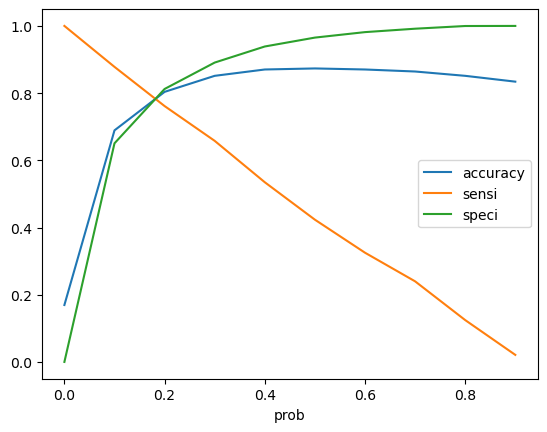

In [89]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

From the Curve 0.2 Seem to be Optimal Cut-Off Point

In [90]:
y_train_pred_final['final_predicted']=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>0.25 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4478,0,0.702279,4478,1,1,1,1,1,1,1,1,1,0,0,1
3685,0,0.047053,3685,0,1,0,0,0,0,0,0,0,0,0,0
731,0,0.456358,731,0,1,1,1,1,1,0,0,0,0,0,1
291,0,0.135623,291,0,1,1,0,0,0,0,0,0,0,0,0
184,0,0.229195,184,0,1,1,1,0,0,0,0,0,0,0,0


In [91]:
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.final_predicted)

0.8319271758436945

In [92]:
confusion1=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.final_predicted)
confusion1

array([[3208,  533],
       [ 224,  539]], dtype=int64)

In [93]:
TP=confusion1[1,1]
TN=confusion1[0,0]
FP=confusion1[0,1]
FN=confusion1[1,0]


In [94]:
sensi=TP/(TP+FN)
sensi

0.7064220183486238

In [95]:
speci=TN/(TN+FP)
speci

0.8575247260090885

In [96]:
PPV=TP/(TP+FP)
PPV

0.5027985074626866

In [97]:
NPV=TN/(TN+FN)

In [98]:
NPV

0.9347319347319347

# Precision and Recall

In [99]:
Precision=TP/(TP+FP)
Precision

0.5027985074626866

In [100]:
Recall=TP/(TP+FN)
Recall

0.7064220183486238

In [101]:
from sklearn.metrics import f1_score

In [102]:
f1_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.53125

Precison and Recall Tradeoff

In [103]:
from sklearn.metrics import precision_recall_curve

In [104]:
p,r,thresolds=precision_recall_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

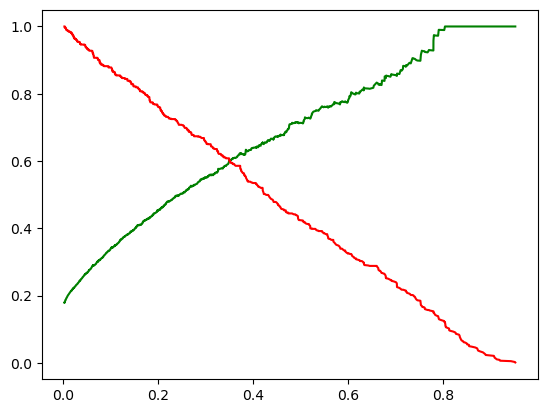

In [105]:
plt.plot(thresolds,p[:-1],"g-")
plt.plot(thresolds,r[:-1],"r-")
plt.show()

# Making Predictions on Test Set

In [106]:
X_test[['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']]=scaler.transform(X_test[['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']])

In [107]:
X_test=X_test[col]
X_test.head()

,Tenure,NumberOfDeviceRegistered,NumberOfAddress,Complain,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_E wallet,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,MaritalStatus_Single
4331,-1.094501,2.258451,-0.853874,-0.634569,0,0,0,0,0,0,1
1988,0.570432,-2.628675,-0.465169,1.575872,1,0,0,0,1,0,0
3443,0.332585,0.303601,-0.465169,1.575872,0,0,0,0,0,0,1
4559,-0.618805,1.281026,-0.465169,-0.634569,0,1,0,0,0,0,0
4898,0.332585,1.281026,-0.465169,-0.634569,1,0,0,0,0,0,0


In [108]:
X_test_sm=sm.add_constant(X_test)

In [109]:
y_test_pred=res.predict(X_test_sm)

In [110]:
y_test_pred[:10]

4331    0.532563
1988    0.009007
3443    0.266747
4559    0.121287
4898    0.025647
4641    0.252915
2117    0.001617
3268    0.190055
977     0.442988
1115    0.036874
dtype: float64

In [111]:
y_pred_1=pd.DataFrame(y_test_pred)

In [112]:
y_pred_1.head()

,0
4331,0.532563
1988,0.009007
3443,0.266747
4559,0.121287
4898,0.025647


In [113]:
y_test_df=pd.DataFrame(y_test)

In [114]:
y_test_df['Cust ID']=y_test_df.index

In [115]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [116]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,Churn,Cust ID,0
0,1,4331,0.532563
1,0,1988,0.009007
2,0,3443,0.266747
3,0,4559,0.121287
4,0,4898,0.025647


In [117]:
y_pred_final=y_pred_final.rename(columns={0:'Churn_Prob'})

In [118]:

y_pred_final.head()

,Churn,Cust ID,Churn_Prob
0,1,4331,0.532563
1,0,1988,0.009007
2,0,3443,0.266747
3,0,4559,0.121287
4,0,4898,0.025647


In [119]:
y_pred_final['final_predicted']=y_pred_final.Churn_Prob.map(lambda x: 1 if x>0.38 else 0)
y_pred_final.head()

,Churn,Cust ID,Churn_Prob,final_predicted
0,1,4331,0.532563,1
1,0,1988,0.009007,0
2,0,3443,0.266747,0
3,0,4559,0.121287,0
4,0,4898,0.025647,0


In [120]:
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.final_predicted)

0.8827708703374778

In [121]:
confusion2=metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.final_predicted)
confusion2

array([[880,  61],
       [ 71, 114]], dtype=int64)

In [122]:
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]


In [123]:
Precision=TP/(TP+FP)
Precision

0.6514285714285715

In [124]:
Recall=TP/(TP+FN)
Recall

0.6162162162162163

In [125]:
f1_score(y_pred_final.Churn,y_pred_final.final_predicted)

0.6333333333333333